In [1]:
DATA_PATH = '../../data/Classification/raw/HAM10000_metadata.csv'
EXPORT_PATH = '../../data/Classification/processed/2_preprocessed_df.pkl'
BASE_SKIN_DIR='../../data/Classification/raw'

In [2]:
import pandas as pd
import missingno as ms
import plotly.express as px
import numpy as np
import os
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image

In [3]:
raw_df = pd.read_csv(DATA_PATH)

Missing values / Integer

In [4]:
raw_df.isna().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

<AxesSubplot:>

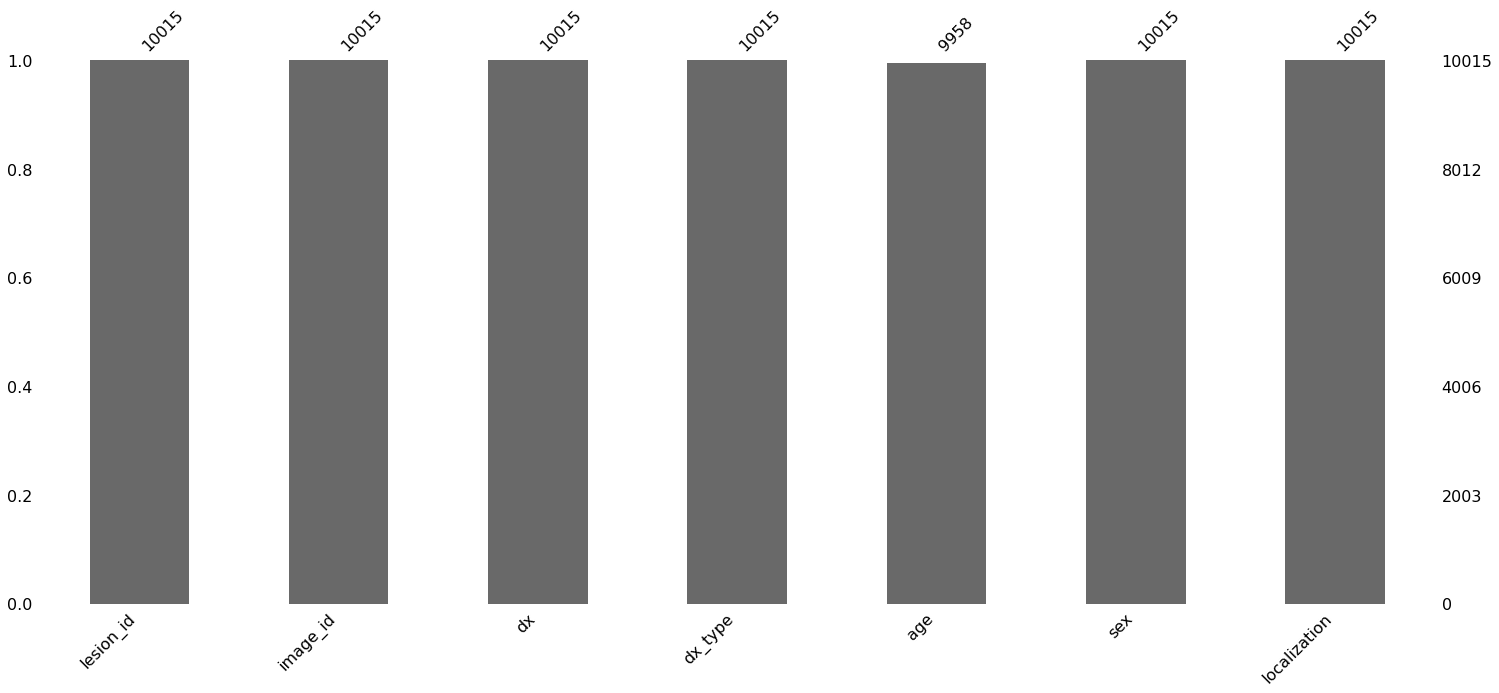

In [5]:
ms.bar(raw_df)

--> Handling missing values

In [6]:
raw_df['age'].fillna(raw_df['age'].mean(),inplace=True)

In [7]:
raw_df.isna().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

In [8]:
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(BASE_SKIN_DIR, '*', '*.jpg'))}

In [9]:
raw_df['path'] = raw_df['image_id'].map(imageid_path_dict.get)

In [10]:
raw_df['path']

0        ../../data/Classification/raw\all\ISIC_0027419...
1        ../../data/Classification/raw\all\ISIC_0025030...
2        ../../data/Classification/raw\all\ISIC_0026769...
3        ../../data/Classification/raw\all\ISIC_0025661...
4        ../../data/Classification/raw\all\ISIC_0031633...
                               ...                        
10010    ../../data/Classification/raw\all\ISIC_0033084...
10011    ../../data/Classification/raw\all\ISIC_0033550...
10012    ../../data/Classification/raw\all\ISIC_0033536...
10013    ../../data/Classification/raw\all\ISIC_0032854...
10014    ../../data/Classification/raw\all\ISIC_0032258...
Name: path, Length: 10015, dtype: object


Image Preprocessing

In [11]:
raw_df['image']= raw_df['path'].map(lambda x: np.asarray(Image.open(x).resize((125,100))))

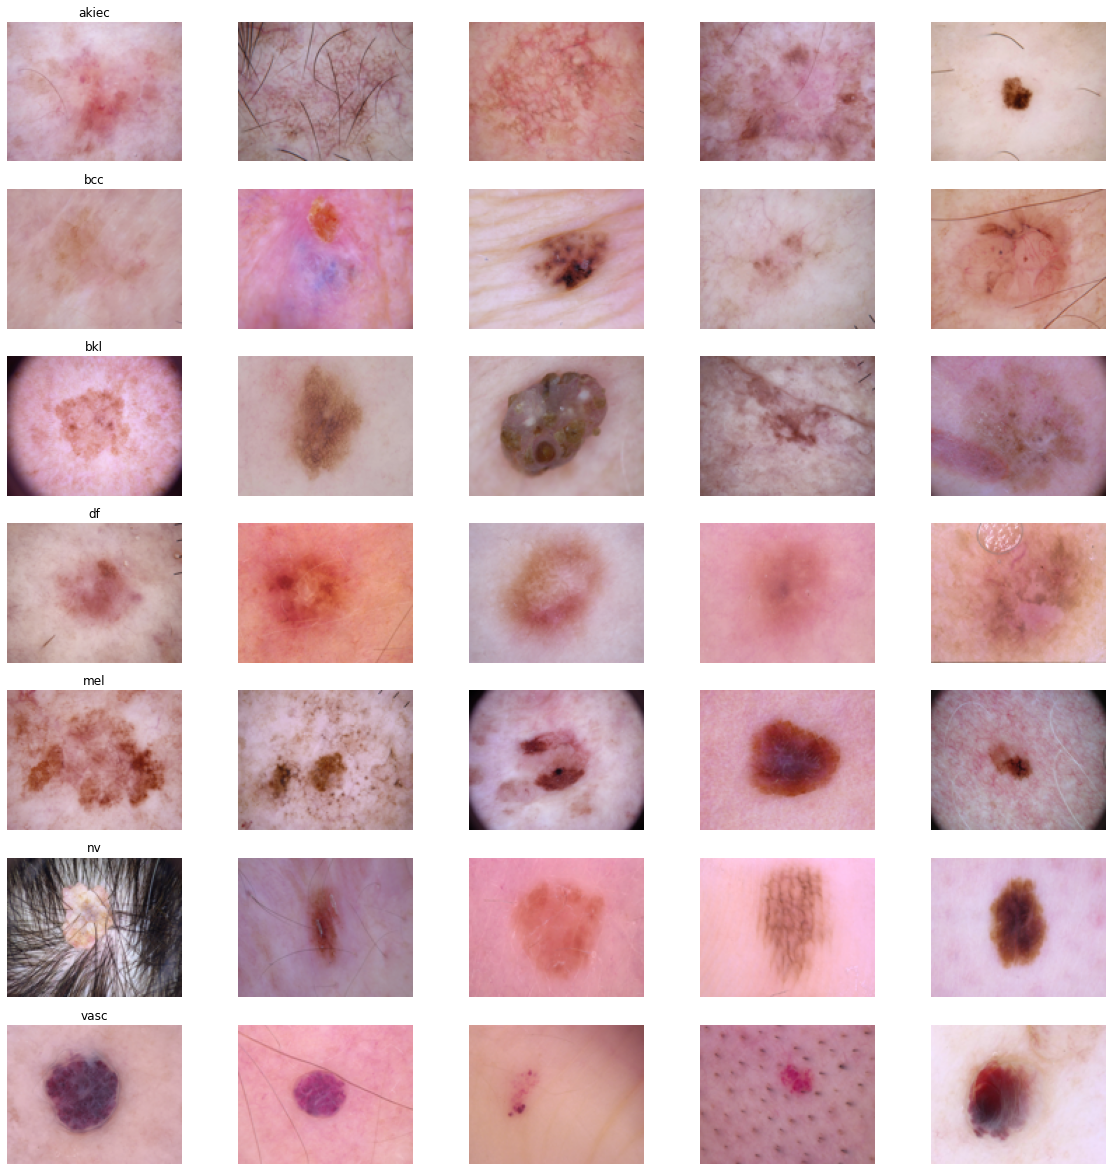

In [12]:
n_samples = 5
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         raw_df.sort_values(['dx']).groupby('dx')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=2018).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')
fig.savefig('category_samples.png', dpi=300)

In [13]:
raw_df['image'].map(lambda x: x.shape).value_counts()

(100, 125, 3)    10015
Name: image, dtype: int64

EXPORT DATA

In [14]:
raw_df.to_pickle(EXPORT_PATH)